In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('../data/motor_vehicle_collisions_crashes_clean.csv', low_memory=False)
# temp = data.loc[data['BOROUGH'] == 'MANHATTAN', ['LATITUDE', 'LONGITUDE']].dropna()

In [20]:
# temp = data.loc[(data['NUMBER OF PEDESTRIANS INJURED'] > 0) | (data['NUMBER OF PEDESTRIANS KILLED'] > 0), ['LATITUDE', 'LONGITUDE']].dropna()
# temp = data.loc[data['NUMBER OF PEDESTRIANS INJURED'] > 0, ['LATITUDE', 'LONGITUDE']].dropna()
temp = data.loc[data['NUMBER OF PEDESTRIANS KILLED'] > 0, ['LATITUDE', 'LONGITUDE']].dropna()
drop_lat = temp[np.abs(temp['LATITUDE']-temp['LATITUDE'].mean()) <= (temp['LATITUDE'].std())]
drop_long = drop_lat[np.abs(drop_lat['LONGITUDE']-drop_lat['LONGITUDE'].mean()) <= (drop_lat['LONGITUDE'].std())]
X = drop_long.values

In [21]:
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

C:\Users\Sudheendra Katikar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


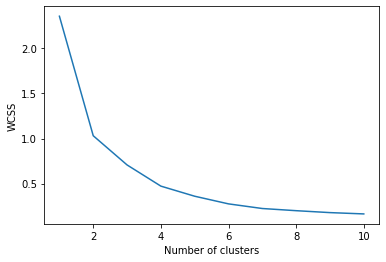

In [22]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

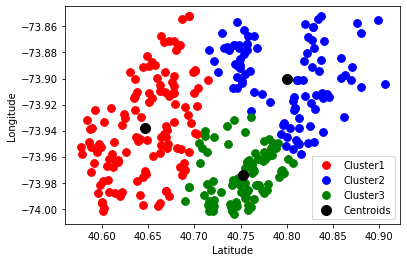

In [24]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend() 
plt.show()

In [13]:
kmeans.cluster_centers_

array([[ 40.8408335 , -73.90800342],
       [ 40.64728639, -73.94578625],
       [ 40.7472261 , -73.94806565]])

In [19]:
X.shape

(24598, 2)